In [38]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import random
pio.templates.default = 'simple_white'
import datetime
import tqdm

In [39]:
pio.renderers.default = "png"

### Modelling retention

In [40]:
def get_retention(a, b, c, d, periods):
    return  a + 1./(b + c*periods ** d)

def get_retention_same_event(a, c, d, periods):
    b = 1./(1 - a)
    return get_retention(a, b, c, d, periods)

In [41]:
sample_df = pd.DataFrame()
sample_df['periods'] = range(30)

/var/folders/7v/1ln722x97kd8bchgxpmdkynw0000gn/T/ipykernel_6996/2375475211.py:18: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



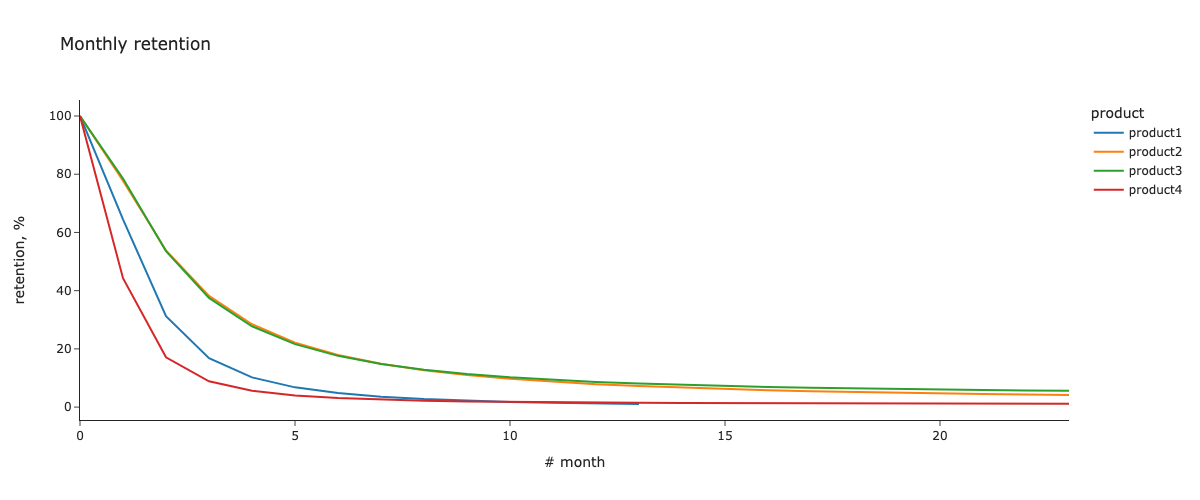

In [42]:
sample_df = pd.DataFrame()
sample_df['periods'] = range(24)

product_coefs = [
    (0, 0.55, 2),
    (0.02, 0.3, 1.6),
    (0.04, 0.3, 1.7),
    (0.01, 1.3, 2)
]

for i in range(len(product_coefs)):
    sample_df['product' + str(i + 1)] = sample_df.periods.map(
        lambda x: get_retention_same_event(product_coefs[i][0], product_coefs[i][1],
                                           product_coefs[i][2], x)
    )
    
sample_df = sample_df.set_index('periods')
px.line(sample_df.applymap(lambda x: None if x < 0.01 else 100*x).loc[0:],
        width = 1200,
       title = 'Monthly retention',
       labels = {'value': 'retention, %',
                'periods': '# month',
                'variable': 'product'})

In [60]:
df = pd.DataFrame(
    {'browser': list(map(lambda x: random.choices(['Safari', 'Chrome'])[0], range(100))),
     'platform': list(map(lambda x: random.choices(['iOS', 'Android'])[0], range(100))),
    'user_id': list(map(lambda x: random.choices([1, 2, 3, 4, 5, 6, 7, 8 , 9, 10])[0], range(100))),
    'time': list(map(lambda x: random.random(), range(100))),
     'transaction_id': list(map(lambda x: x, range(100)))
    }
    )

In [69]:
df

,browser,platform,user_id,time,transaction_id
0,Safari,iOS,6,0.557765,0
1,Chrome,Android,9,0.683048,1
2,Safari,iOS,5,0.542305,2
3,Safari,Android,8,0.988194,3
4,Safari,Android,5,0.940619,4
...,...,...,...,...,...
95,Safari,iOS,4,0.841966,95
96,Safari,Android,7,0.917611,96
97,Safari,iOS,1,0.331618,97
98,Safari,Android,7,0.461919,98


In [71]:
df.groupby(['browser', 'platform'], as_index = False).user_id.nunique()\
    .merge(df.groupby(['plarform'], as_index = False).user_id.nunique().rename(columns = {'user_id': 'total_users'})

SyntaxError: unexpected EOF while parsing (4055637378.py, line 2)

In [65]:
df.groupby(['browser', 'platform', 'user_id'], as_index = False)\
    .aggregate({'transaction_id': 'count',  'time': 'mean'})\
    .rename(columns = {'transaction_id': 'transactions', 'time': 'avg_time'})\
    .groupby(['browser', 'platform'], as_index = False).transactions.sum()\
    .pivot(index = 'browser', columns = 'platform', values = 'transactions')

platform,Android,iOS
browser,,
Chrome,23,24
Safari,25,28


In [66]:
users_df = df.groupby(['browser', 'platform', 'user_id'], as_index = False)\
  .aggregate({'transaction_id': 'count',  'time': 'mean'})\
  .rename(columns = {'transaction_id': 'transactions', 'time': 'avg_time'})

transactions_stats_df = users_df.pivot_table(
  index = 'browser', columns = 'platform', 
  values = 'transactions', aggfunc = 'sum')

In [67]:
transactions_stats_df

platform,Android,iOS
browser,,
Chrome,23,24
Safari,25,28
